In [3]:
!pip install pandas

In [73]:
import pandas as pd
import time

In [14]:
filename = "../data/person_data.csv"

In [50]:
# Fonction (file.csv, int) -> df

def load_person_data(filename:str, n:int)-> pd.DataFrame:
    df = pd.read_csv(filename, names=['Nom', 'Note'], header=None)
    #df_trie = df.sort_values(by="Nom")
    return df.head(n)
    

In [51]:
# Recherche linaire
def recherche_linaire(df:pd.DataFrame, cible:str)->float:
    # DF n'est pas forcement trié
    noms = df['Nom'].to_list()

    for i in range(len(noms)):
        if noms[i] == cible:
            index_cible = i
            return df.loc[index_cible]['Note']

In [58]:
# Recherche binaire

def recherche_binaire(df:pd.DataFrame, cible:str) ->float:
    # DF est non trié
    df = df.sort_values(by="Nom")
    noms = df['Nom'].to_list()
    low, high = 0, len(noms)-1

    while low <= high:
        mid = (low+high) //2
        if noms[mid]==cible:
            return df.iloc[mid]["Note"]
        elif noms[mid] < cible :
            low = mid + 1
        else:
            high = mid -1

    return None


In [74]:
def fun_gen(df:pd.DataFrame, cible:str, algorithm):

    start_time = time.time()
    note = algorithm(cible=cible, df=df)
    end_time = time.time()

    exec_time = end_time - start_time

    return note, exec_time 

    
    

In [78]:
df = load_person_data(filename, 30)

In [83]:
fun_gen(cible="Hugo", algorithm=recherche_linaire, df=df )

(8.32, 0.0)

In [89]:
def performance_test(filename):
    sizes  = range(10,101,10)
    resultat = []

    for s in sizes:
        df = load_person_data(filename=filename, n=s)

        _, tmp_lineaire = fun_gen(df, "Alex", recherche_linaire)
        _, tmp_binaire = fun_gen(df, "Alex", recherche_binaire)

        resultat.append((s, tmp_lineaire,tmp_binaire))

    return resultat


In [108]:
resultat_test = performance_test(filename=filename)

In [109]:
resultat = pd.DataFrame(resultat_test, columns=["taille","temps Linaire", "temps Binaire"])

In [110]:
resultat

,taille,temps Linaire,temps Binaire
0,10,0.000000,0.001007
1,20,0.000000,0.000500
2,30,0.000000,0.000501
3,40,0.000000,0.000499
4,50,0.000000,0.000500
5,60,0.000000,0.000000
6,70,0.001007,0.000000
7,80,0.000000,0.000501
8,90,0.000000,0.000000
9,100,0.000000,0.000000


In [111]:
list_test = [1,2,3,4,5,6,7,8,9,10,11,12]

In [112]:
def sum1(l):
    total = 0  #1
    for i in range(len(l)): #si l est de taille n , n fois  au total : n+2      O(n)
        total += l[i] #1 
    return total

In [113]:
sum1(list_test)

78

In [115]:
def sum2(l):
    return (len(l) * (len(l)+1)//2) # 1   O(1) 

In [117]:
sum2(list_test)

78

In [18]:
import random
random_values = [random.randint(0, 100) for _ in range(50)]

In [19]:
import matplotlib.pyplot as plt 

In [14]:
import matplotlib.animation as animation


# Function qui va faire la recherche linaire

# Function qui va faire la visualisation (Animation)
    # Crée une figure et des axes
    # Crée un graph (ex. Bar)
    # Function init (début)
    # Function update
    # Function generatrice  (recherche linaire)


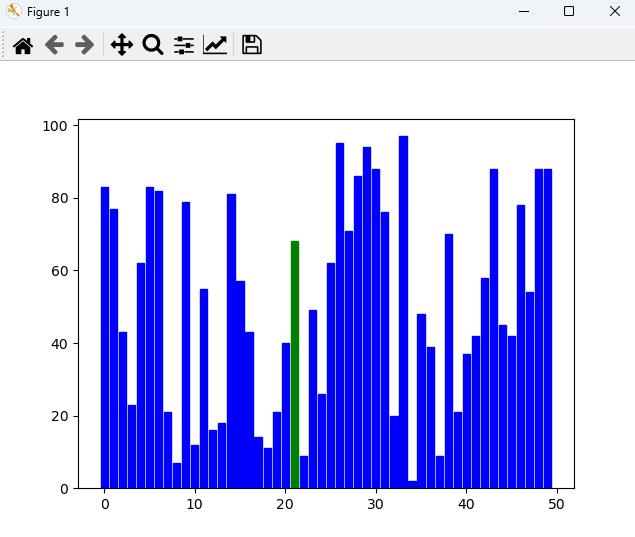

In [35]:
def recherche_linaire_graph(l, cible):
    for i in range(len(l)):
        yield i
        if l[i] == cible:
            return i

In [39]:
def visualize_recherche_linaire(l:list[int], cible:int):
    fig,ax = plt.subplots()

    bars = ax.bar(
        range(len(l)),
        l,
        color = 'blue'
    )

    def init():
        for bar in bars:
            bar.set_color("blue")
        return bars
    
    def update(i):
        for bar in bars:
            bar.set_color("blue")
        bar[i].set_color("red")
        return bars
    
    ani = animation.FuncAnimation(
        fig,
        update,
        frames= recherche_linaire_graph(l,cible),
        init_func= init,
        interval = 100
    )

    plt.show()

    

C:\Users\sayah\AppData\Local\Temp\ipykernel_14428\2331952406.py:21: UserWarning: frames=<generator object recherche_linaire_graph at 0x0000020F9D758C80> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(


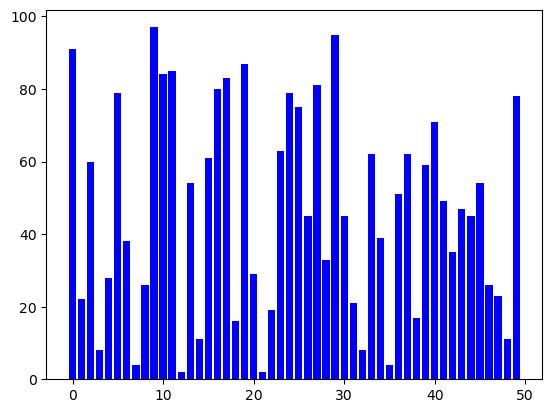

In [40]:
visualize_recherche_linaire(random_values, 83)